In [18]:
import pandas as pd
data = pd.read_csv('/content/trainKNN.txt', sep = ",", header = None, names = ["Id number:", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"])
data

,Id number:,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
191,207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id number:     196 non-null    int64  
 1   RI             196 non-null    float64
 2   Na             196 non-null    float64
 3   Mg             196 non-null    float64
 4   Al             196 non-null    float64
 5   Si             196 non-null    float64
 6   K              196 non-null    float64
 7   Ca             196 non-null    float64
 8   Ba             196 non-null    float64
 9   Fe             196 non-null    float64
 10  Type of glass  196 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 17.0 KB


In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
data.drop('Id number:', axis=1, inplace=True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [23]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [24]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
RI,1.000000,-0.158559,-0.153610,-0.446641,-0.530520,-0.296570,0.821277,0.009425,0.104980,-0.166670
Na,-0.158559,1.000000,-0.216384,0.234219,-0.196462,-0.248626,-0.278983,0.336526,-0.250335,0.484154
Mg,-0.153610,-0.216384,1.000000,-0.520530,-0.095263,-0.039185,-0.461244,-0.488494,0.066167,-0.714713
Al,-0.446641,0.234219,-0.520530,1.000000,0.010147,0.335160,-0.284701,0.477098,-0.067659,0.640944
Si,-0.530520,-0.196462,-0.095263,0.010147,1.000000,-0.181488,-0.197767,-0.162194,-0.058347,0.092812
K,-0.296570,-0.248626,-0.039185,0.335160,-0.181488,1.000000,-0.321540,-0.019632,-0.011720,0.029423
Ca,0.821277,-0.278983,-0.461244,-0.284701,-0.197767,-0.321540,1.000000,-0.100585,0.120076,-0.019545
Ba,0.009425,0.336526,-0.488494,0.477098,-0.162194,-0.019632,-0.100585,1.000000,-0.030133,0.566769
Fe,0.104980,-0.250335,0.066167,-0.067659,-0.058347,-0.011720,0.120076,-0.030133,1.000000,-0.227560
Type of glass,-0.166670,0.484154,-0.714713,0.640944,0.092812,0.029423,-0.019545,0.566769,-0.227560,1.000000


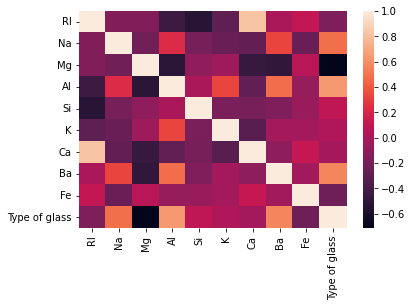

In [25]:
import seaborn as sv
sv.heatmap(data.corr())

In [26]:
x_train = data.drop("Type of glass", axis=1)
x_train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0
192,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0
193,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0


In [27]:
y_train = data["Type of glass"]
y_train

0      1
1      1
2      1
3      1
4      1
      ..
191    7
192    7
193    7
194    7
195    7
Name: Type of glass, Length: 196, dtype: int64

In [28]:
test_data = pd.read_csv('/content/testKNN.txt', sep = ",", header = None, names = ["Id number:", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type of glass"])
test_data

,Id number:,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [29]:
test_data.drop('Id number:', axis=1, inplace=True)

In [30]:
x_test = test_data.drop("Type of glass", axis=1)

In [31]:
y_test = test_data["Type of glass"]
y_test

0     1
1     1
2     1
3     2
4     2
5     2
6     3
7     3
8     3
9     5
10    5
11    5
12    6
13    6
14    6
15    7
16    7
17    7
Name: Type of glass, dtype: int64

In [32]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [33]:
x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

In [34]:
num_cols = ["RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe"]

In [35]:
for i in num_cols:
  scale = StandardScaler().fit(x_train_stand[[i]])
  x_train_stand[i] = scale.transform(x_train_stand[[i]])
  x_test_stand[i] = scale.transform(x_test_stand[[i]])

In [59]:
x_train_stand

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.890812,0.338985,1.246160,-0.722499,-1.123132,-0.684647,-0.113350,-0.339357,-0.583422
1,-0.224796,0.659028,0.605450,-0.192354,0.124197,-0.058701,-0.762215,-0.339357,-0.583422
2,-0.694007,0.198166,0.569455,0.174669,0.465571,-0.192833,-0.797480,-0.339357,-0.583422
3,-0.208390,-0.211490,0.670241,-0.335086,-0.033360,0.075430,-0.487153,-0.339357,-0.583422
4,-0.287138,-0.134679,0.619848,-0.437037,0.583739,0.045623,-0.592946,-0.339357,-0.583422
...,...,...,...,...,...,...,...,...,...
191,-0.605415,2.003210,-1.986187,0.847545,0.623128,-0.774067,-0.169773,2.512125,-0.583422
192,0.004888,1.299115,-1.986187,0.745594,0.294884,1.327320,-1.721408,5.611561,-0.583422
193,-0.621821,1.273511,-1.986187,2.621491,0.281754,-0.774067,0.380352,0.776440,-0.583422
194,-0.677601,0.979071,-1.986187,2.906954,-0.033360,-0.654840,0.189924,1.850912,-0.583422


In [67]:
x_test_stand

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.058153,-0.416318,0.641445,-1.191474,-0.414124,-0.490902,0.662468,-0.339357,1.390145
1,1.058153,-0.326705,0.591052,-1.130303,-0.571681,-0.431288,0.641309,-0.339357,1.274052
2,1.543771,-0.083473,0.591052,-1.293424,-0.847406,-0.595226,0.888160,-0.339357,-0.235146
3,-0.395418,-0.480326,0.511863,0.684424,0.111067,0.209561,-0.515364,-0.339357,-0.583422
4,-0.556197,-0.493128,0.303092,-0.457427,0.439311,0.090333,-0.071033,-0.339357,2.202790
5,0.031138,-0.672352,0.655843,-0.437037,-0.085879,0.149947,-0.162720,-0.339357,3.479804
6,0.008170,-0.057869,0.418276,0.174669,-0.650460,0.060526,0.055919,-0.339357,-0.583422
7,0.342852,0.338985,0.562256,-1.436156,0.019159,-0.535612,-0.014610,-0.029413,2.202790
8,1.251744,1.043080,0.735032,-1.109913,-1.674582,-0.431288,0.161713,-0.339357,3.711988
9,0.700502,0.006140,-1.986187,-0.110794,-0.506032,-0.282253,2.531482,-0.339357,-0.583422


In [103]:
from sklearn.neighbors import KNeighborsClassifier
neigh1 = KNeighborsClassifier(n_neighbors=1, metric = "euclidean")
neigh1.fit(x_train_stand, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [104]:
neigh1.predict(x_test_stand)

array([1, 1, 1, 2, 1, 1, 3, 2, 2, 5, 2, 1, 6, 2, 6, 7, 7, 7])

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, neigh1.predict(x_test_stand))

0.6111111111111112

In [106]:
from sklearn.metrics import classification_report

In [107]:
print(classification_report(y_test, neigh1.predict(x_test_stand)))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.20      0.33      0.25         3
           3       1.00      0.33      0.50         3
           5       1.00      0.33      0.50         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.61        18
   macro avg       0.78      0.61      0.62        18
weighted avg       0.78      0.61      0.62        18



In [108]:
from sklearn.neighbors import KNeighborsClassifier
neigh2 = KNeighborsClassifier(n_neighbors=1, metric = "manhattan")
neigh2.fit(x_train_stand, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [109]:
neigh2.predict(x_test_stand)

array([1, 1, 1, 2, 1, 1, 3, 2, 1, 5, 2, 5, 6, 2, 6, 7, 7, 7])

In [110]:
accuracy_score(y_test, neigh2.predict(x_test_stand))

0.6666666666666666

In [111]:
print(classification_report(y_test, neigh2.predict(x_test_stand)))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         3
           2       0.25      0.33      0.29         3
           3       1.00      0.33      0.50         3
           5       1.00      0.67      0.80         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.67        18
   macro avg       0.79      0.67      0.68        18
weighted avg       0.79      0.67      0.68        18



###For comparing performance of the two models, KNN model is run using n_neighbors = 1,3,5,7. But the accuracy_score is high when n_neighbors =1. Hence the results are shown only for n_neighbors = 1.  

###When n_neighbors = 1, accuracy_score for KNN model with "manhattan" distance metric is 0.666 which is greater than accuracy_score for KNN model with "euclidean" distance metric 0.611 


